In [318]:
import os, sys, glob, re
import datetime as dt
import numpy as np
from matplotlib.dates import date2num,num2date
import h5py

In [319]:
sys.path.insert(0,'..')
sys.path.insert(0,'../mi_instrument/')
import db_diff
import decomp_plot

In [320]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [321]:
%matplotlib inline

In [322]:
# Set param
ping_time_param_names = ["hour_all","min_all","sec_all"]
ping_time_param_vals = (range(24),range(20),range(0,60,5))
ping_time_param = dict(zip(ping_time_param_names,ping_time_param_vals))
ping_per_day = len(ping_time_param['hour_all'])*len(ping_time_param['min_all'])*len(ping_time_param['sec_all'])

ping_bin_range = 40
depth_bin_range = 10
tvg_correction_factor = 2

ping_per_day_mvbs = ping_per_day/ping_bin_range

In [323]:
MVBS_path = '/media/wu-jung/wjlee_apl_2/ooi_zplsc_new/'
MVBS_fname = '20150817-20151017_MVBS.h5'

In [324]:
f = h5py.File(os.path.join(MVBS_path,MVBS_fname),"r")
MVBS = np.array(f['MVBS'])
depth_bin_size = np.array(f['depth_bin_size'])
ping_time = np.array(f['ping_time'])
f.close()

In [325]:
import copy

In [326]:
plot_param_base = dict([("x_ticks_spacing", 5),\
                       ("y_ticks_num",5),\
                       ("y_start_idx",1),\
                       ("y_end_idx",-2),\
                       ("c_min",-80),\
                       ("c_max",-40),\
                       ("c_ticks_spacing",10),\
                       ("ping_per_day_mvbs",ping_per_day_mvbs),\
                       ("depth_bin_size",depth_bin_size),\
                       ("ping_time",ping_time)])

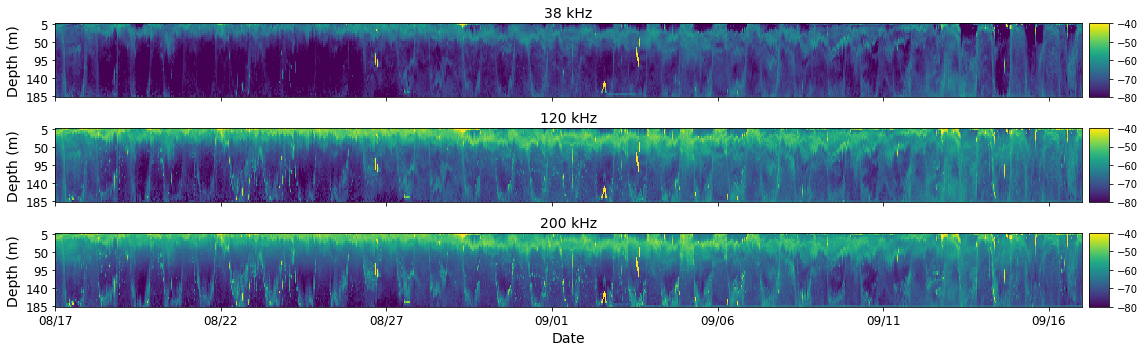

In [327]:
plot_param_raw = copy.deepcopy(plot_param_base)
db_diff.plot_echogram(MVBS,1,31,plot_param_raw,fig_size=(16,5),cmap_name='viridis')
plt.gcf()
plt.savefig(os.path.join(MVBS_path,'echogram_day01-31.png'))

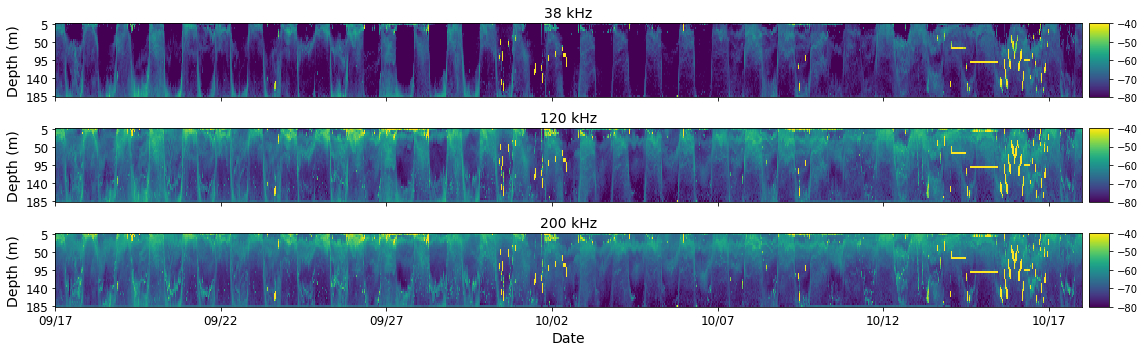

In [328]:
db_diff.plot_echogram(MVBS,32,31,plot_param_raw,fig_size=(16,5),cmap_name='viridis')
plt.gcf()
plt.savefig(os.path.join(MVBS_path,'echogram_day32-62.png'))

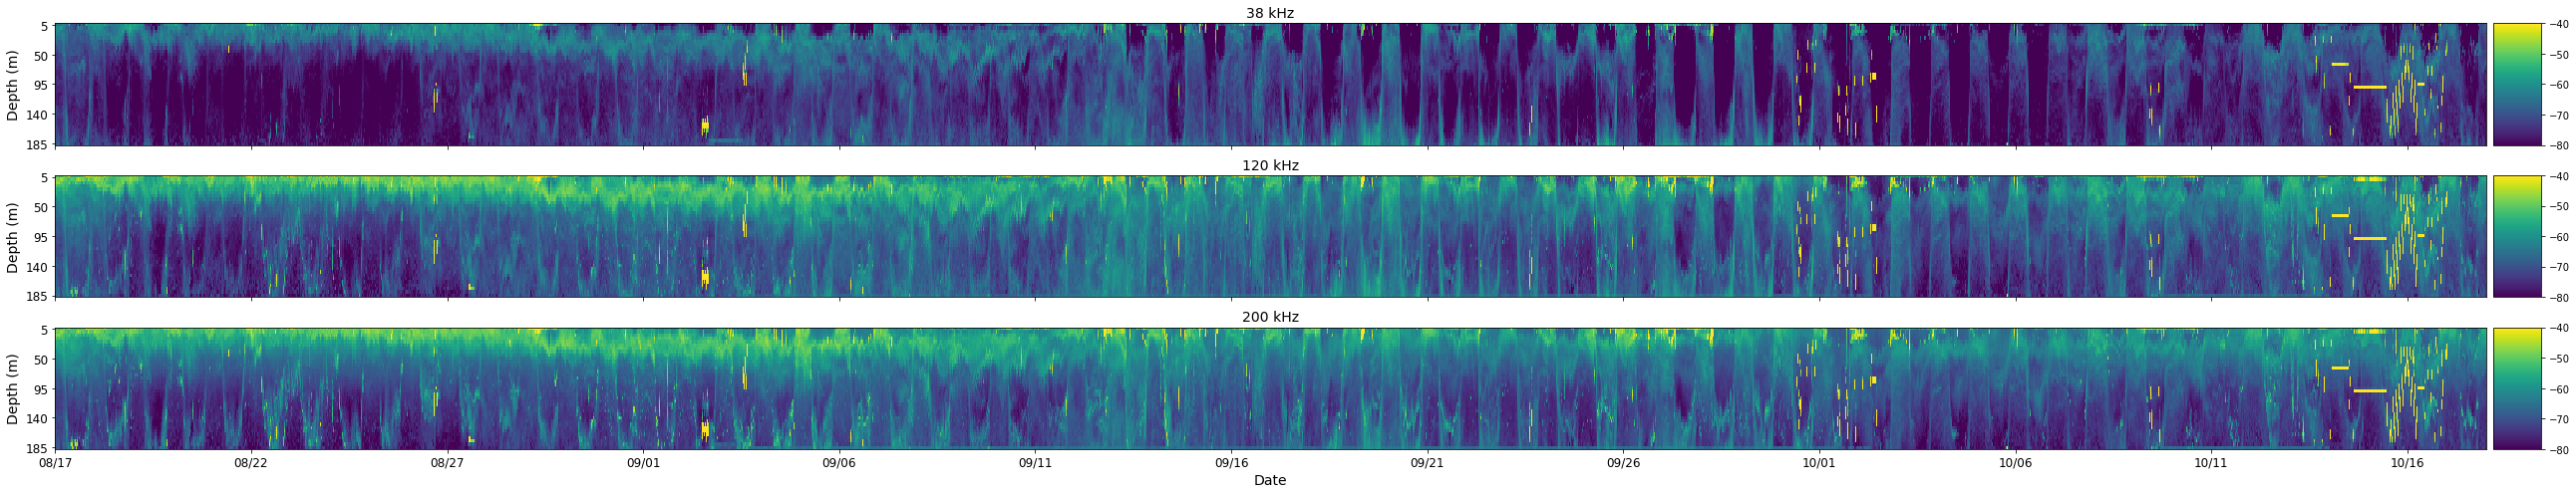

In [329]:
db_diff.plot_echogram(MVBS,1,62,plot_param_raw,fig_size=(36,7),cmap_name='viridis')
plt.gcf()
plt.savefig(os.path.join(MVBS_path,'echogram_day01-62.png'),dpi=150)

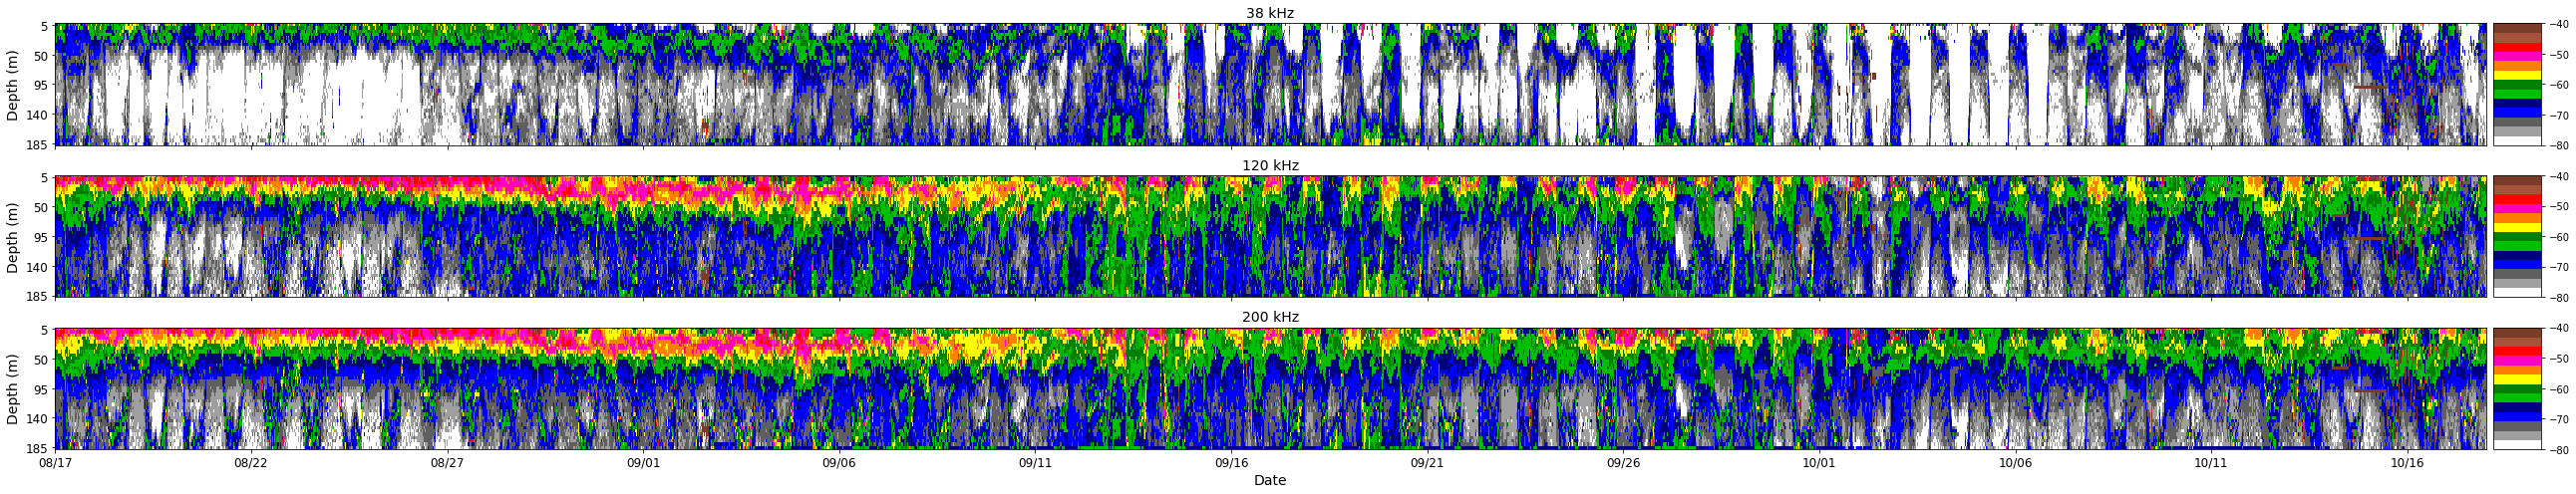

In [330]:
db_diff.plot_echogram(MVBS,1,62,plot_param_raw,fig_size=(36,7),cmap_name=db_diff.e_cmap)
plt.gcf()
plt.savefig(os.path.join(MVBS_path,'echogram_day01-62_ek60cmap.png'),dpi=150)

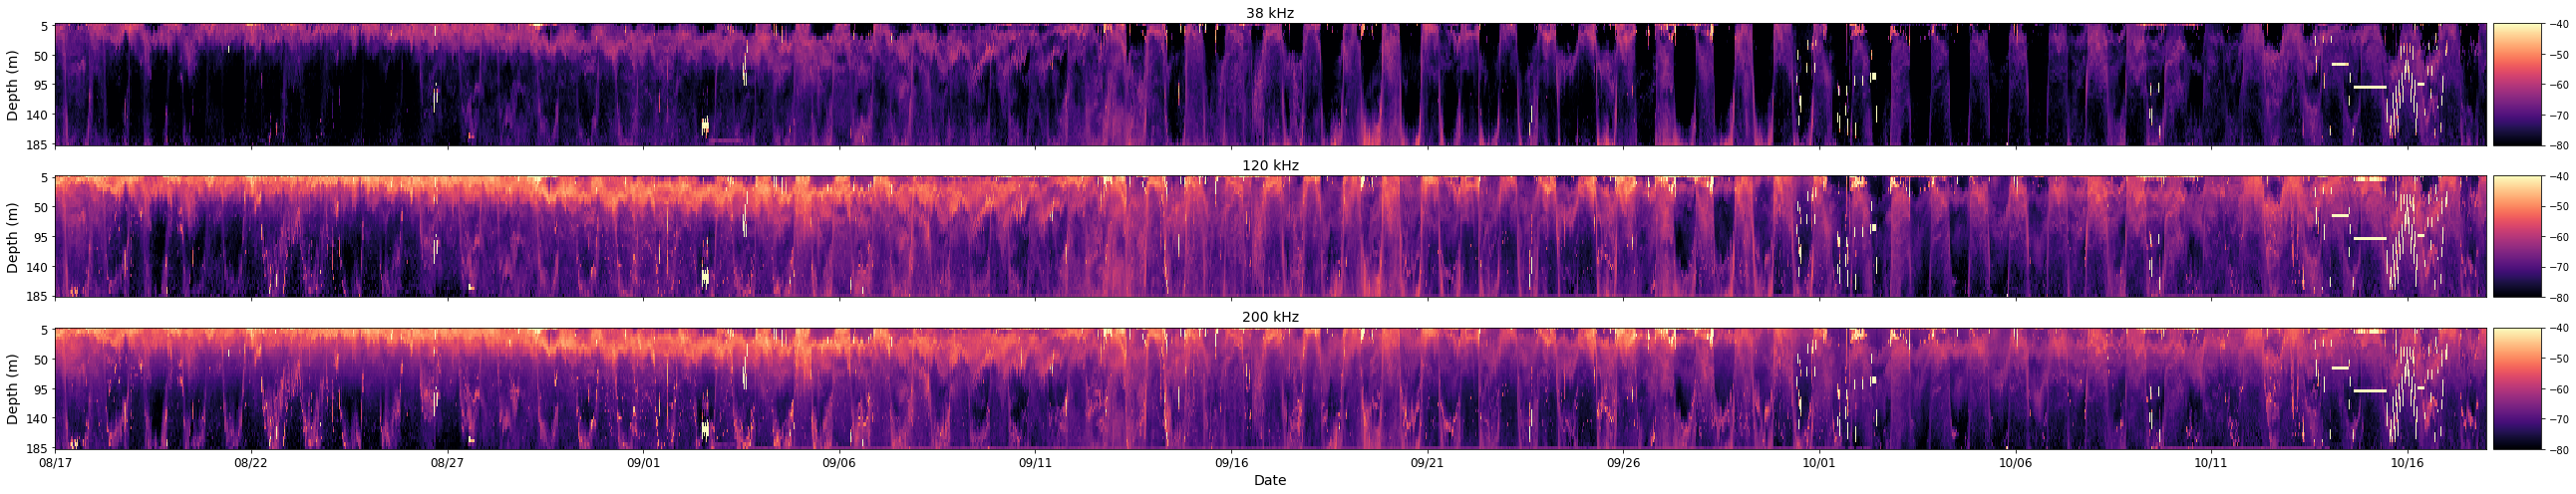

In [331]:
db_diff.plot_echogram(MVBS,1,62,plot_param_raw,fig_size=(36,7),cmap_name='magma')
plt.gcf()
plt.savefig(os.path.join(MVBS_path,'echogram_day01-62_magma.png'),dpi=150)